# BlackRock Noisy Panel Data Puzzle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
import os

os.chdir('/Users/zimingwang/desktop/2018/BlackRock')
data = pd.read_csv('data.csv', index_col=0)
data2 = pd.read_csv('data.csv', index_col=0)


In [4]:
# A brief summary of the data
data.describe()

,sig.0001,sig.0002,sig.0003,sig.0004,sig.0005,sig.0006,sig.0007,sig.0008,sig.0009,sig.0010,...,sig.0041,sig.0042,sig.0043,sig.0044,sig.0045,sig.0046,sig.0047,sig.0048,sig.0049,sig.0050
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,...,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,-0.009245,0.010331,0.023678,0.003693,-0.028997,0.044313,-0.016797,-0.022324,0.004028,0.021681,...,0.020237,0.011441,-0.023725,0.008983,0.018113,0.012419,-0.037271,-0.011683,-0.021042,0.021894
std,1.394840,1.488754,1.386090,1.339229,1.637783,1.354947,1.340255,1.257658,1.315804,1.365348,...,1.399607,1.308771,1.288299,1.303261,1.337057,1.414719,1.315358,1.309446,1.415553,1.359027
min,-5.921308,-7.034904,-5.008178,-6.354693,-7.465328,-6.060215,-7.657676,-4.997675,-5.452313,-6.155391,...,-7.093790,-6.546104,-6.016546,-5.397768,-5.353433,-6.812222,-7.024190,-7.112602,-6.431593,-6.409285
25%,-0.861943,-0.817749,-0.847725,-0.818705,-1.059241,-0.731308,-0.816357,-0.769304,-0.799528,-0.810633,...,-0.785135,-0.774184,-0.799420,-0.764266,-0.831780,-0.811434,-0.773439,-0.771524,-0.875673,-0.771622
50%,-0.020086,0.027081,0.027991,0.029008,-0.012326,0.049240,0.038389,-0.026474,-0.001311,0.004310,...,0.028630,-0.006124,-0.010779,0.009067,0.014089,0.020601,-0.022046,-0.027497,-0.034103,0.019834
75%,0.863059,0.879645,0.843743,0.823281,1.028542,0.845257,0.775758,0.744726,0.779883,0.903928,...,0.850549,0.797428,0.736082,0.772923,0.830497,0.867158,0.710916,0.759456,0.823776,0.873485
max,6.122230,6.468382,6.776746,5.770354,7.195405,7.140175,5.506364,6.742964,6.035447,5.757190,...,6.731320,6.291640,6.732405,6.589563,6.773119,7.712463,6.171996,5.489231,6.791841,6.682983


In [22]:
# Augmented Dickey-Fuller test
# The first number is the test statistics
# Compare it with thresholds at 1% and 5%, we can see they are much smaller
for i in range (1,51):
    if i < 10:
        col_name = 'sig.000' + str(i)
    if i > 9:
        col_name = 'sig.00' + str(i)
    series = data[col_name].tolist()
    x = np.array(series)
    result = ts.adfuller(x)[:2]
    print(i,result)

1 (-13.039450341076908, 2.257090011448472e-24)
2 (-17.94875240382422, 2.843571428505801e-30)
3 (-17.37353912642121, 5.1212283801555156e-30)
4 (-10.278275174898152, 3.839179158241712e-18)
5 (-18.22229849125247, 2.3782178865939708e-30)
6 (-15.225792141455138, 5.406272799537462e-28)
7 (-11.039496442891055, 5.4107759297503854e-20)
8 (-11.74982760336086, 1.2166566137401713e-21)
9 (-14.228561618302681, 1.61135337380826e-26)
10 (-17.07213779609672, 7.811956745846123e-30)
11 (-49.646905348571195, 0.0)
12 (-14.052747809924835, 3.1561516447216746e-26)
13 (-18.05909763499761, 2.6250458121883563e-30)
14 (-13.964193516742613, 4.463629020735996e-26)
15 (-11.704933835202409, 1.5369490253796701e-21)
16 (-13.09167110227606, 1.7832325034436154e-24)
17 (-12.700689785394847, 1.0815727980788214e-23)
18 (-17.45153479999921, 4.649829324221467e-30)
19 (-12.821259800335513, 6.146195575060705e-24)
20 (-10.968585246053722, 7.986473075472122e-20)
21 (-14.769141313997638, 2.33720643531162e-27)
22 (-15.467818539780

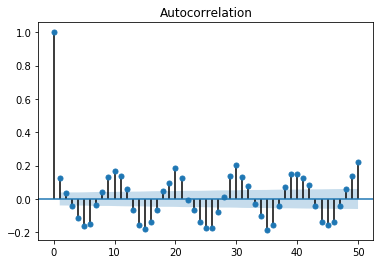

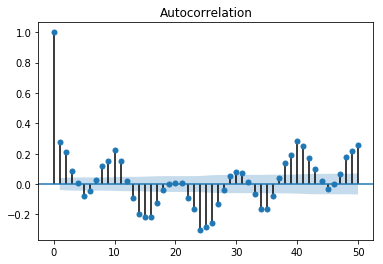

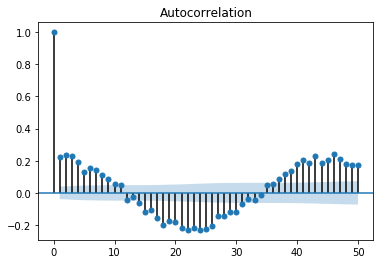

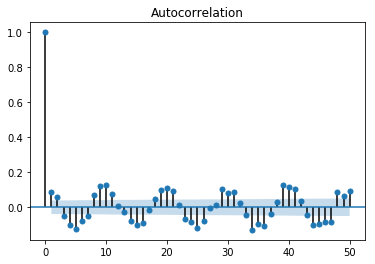

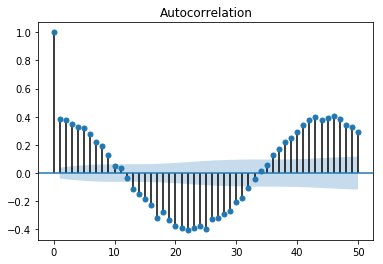

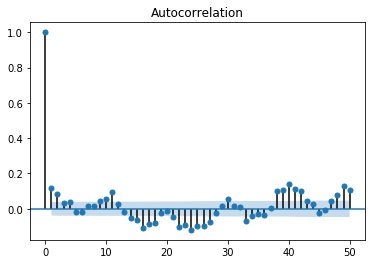

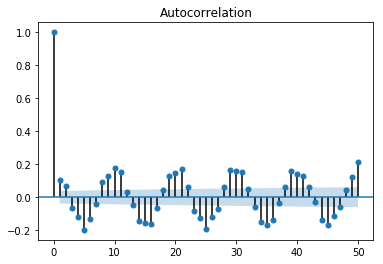

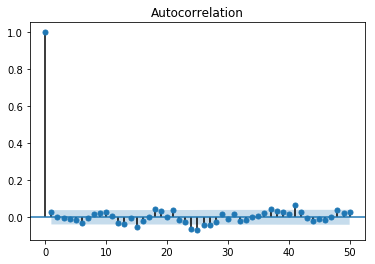

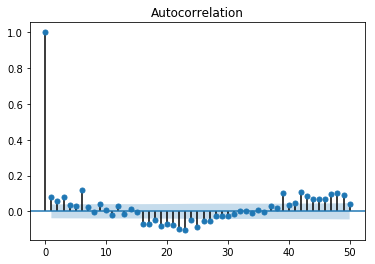

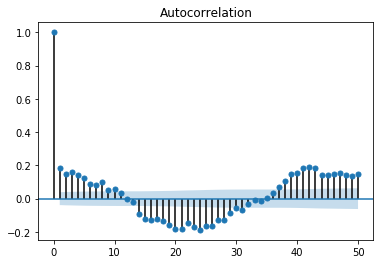

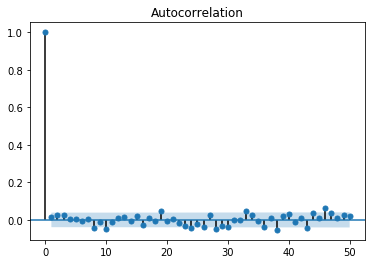

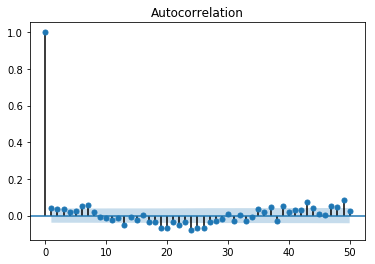

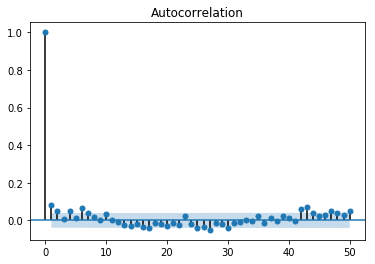

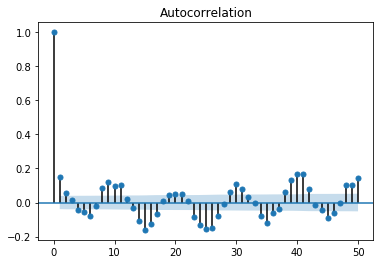

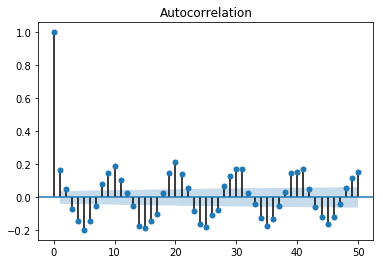

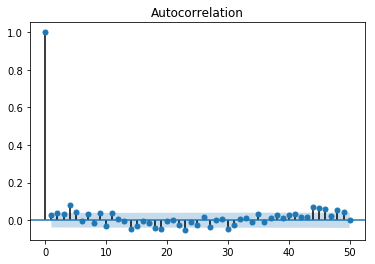

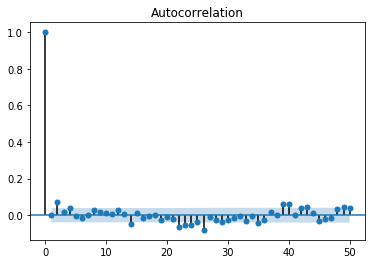

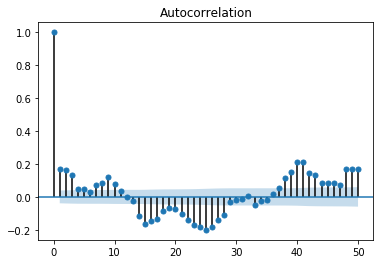

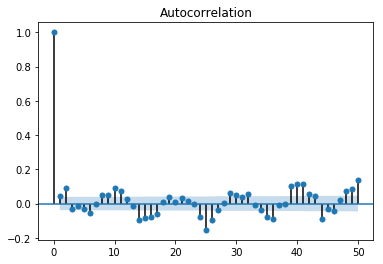

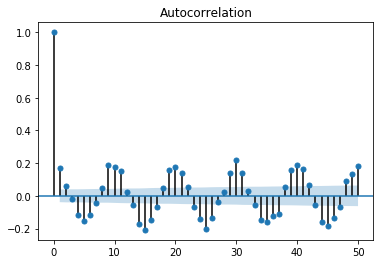

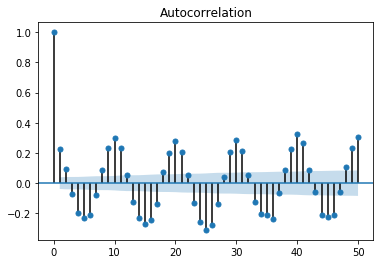

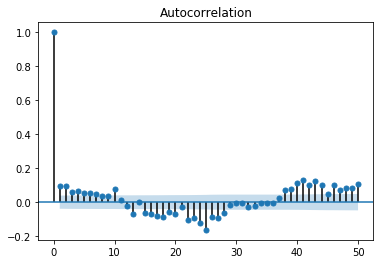

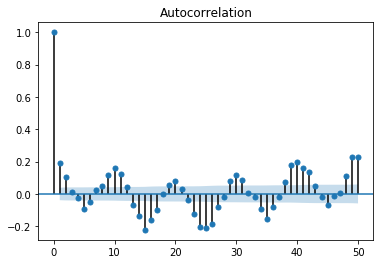

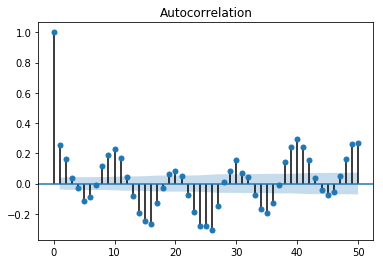

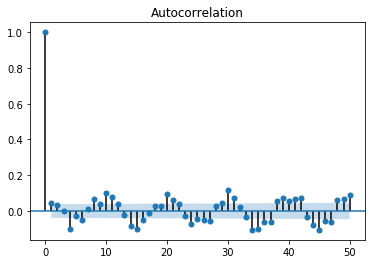

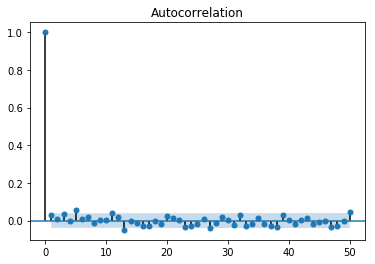

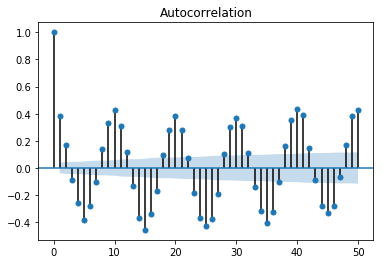

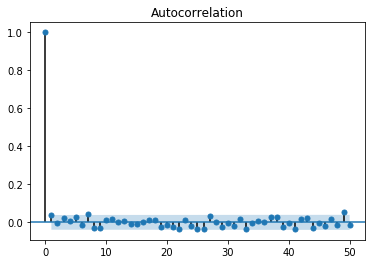

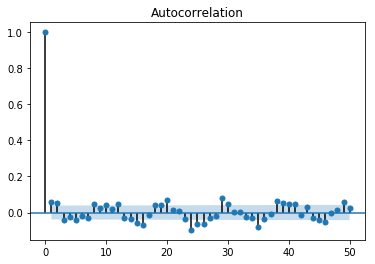

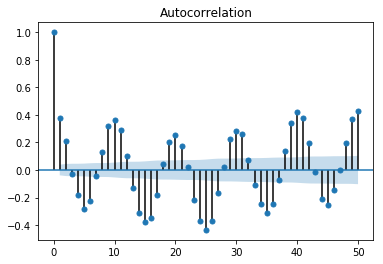

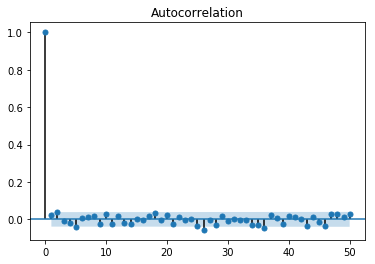

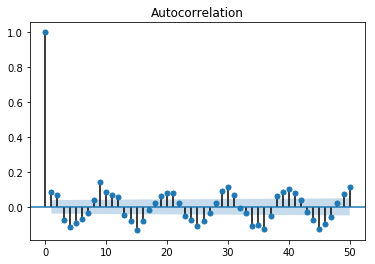

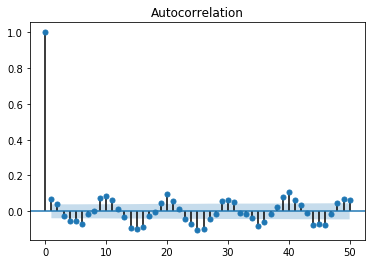

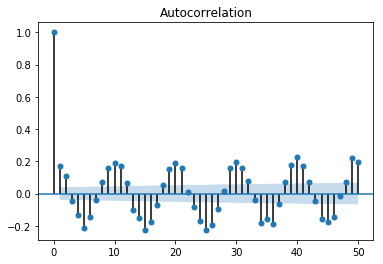

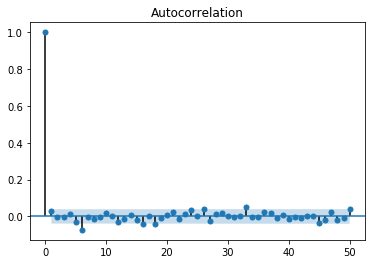

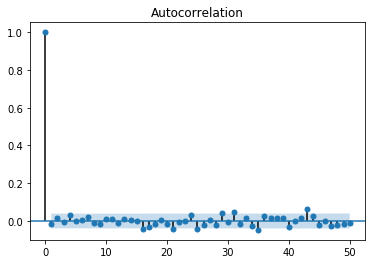

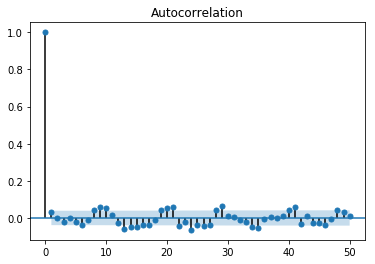

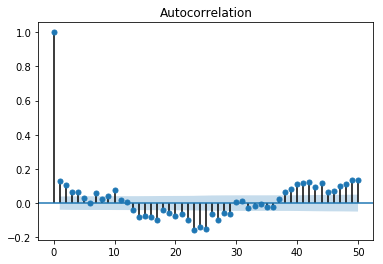

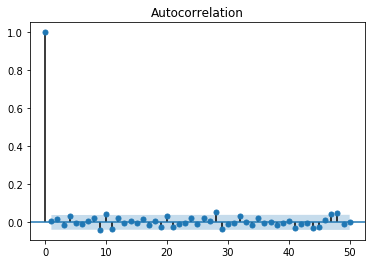

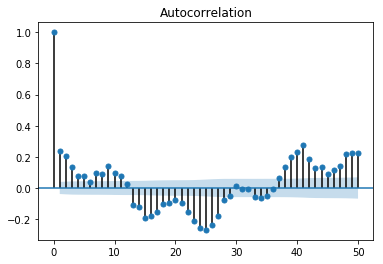

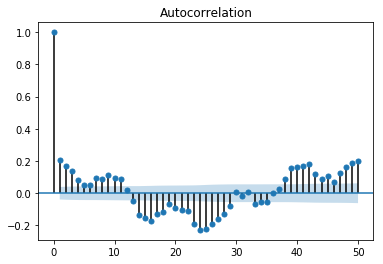

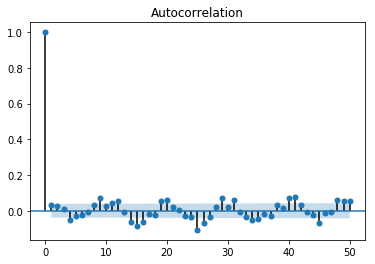

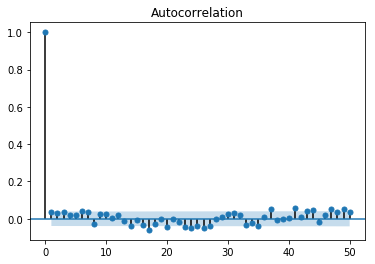

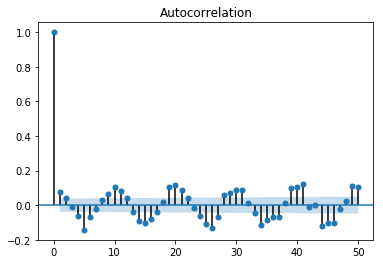

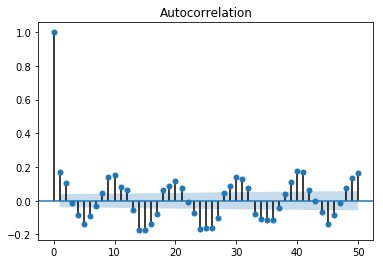

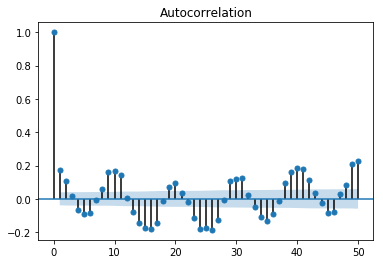

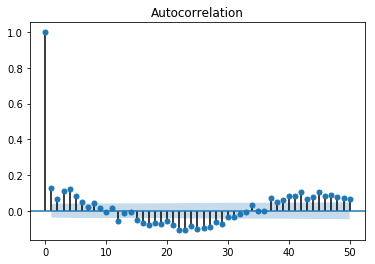

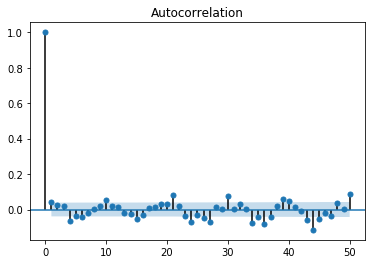

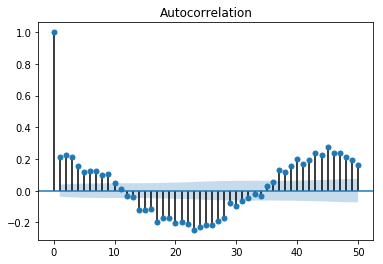

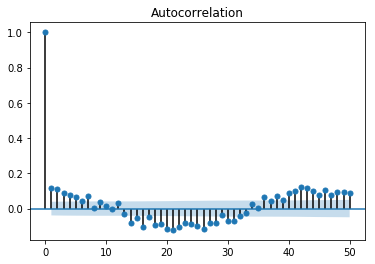

In [18]:
# Auto-correlation plots for 50 variables
from statsmodels.graphics.tsaplots import plot_acf
for i in list(data2):
    series = data[[str(i)]]
    plot_acf(series, lags=50)
    pyplot.show()

Lag: 27
RMSE: 0.847


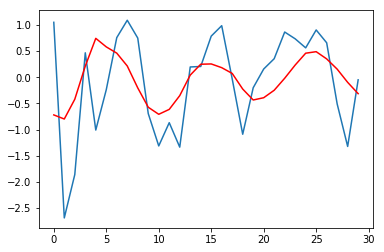

Lag: 27
RMSE: 1.047


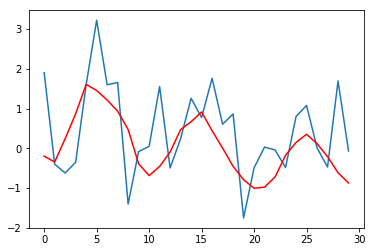

Lag: 27
RMSE: 0.981


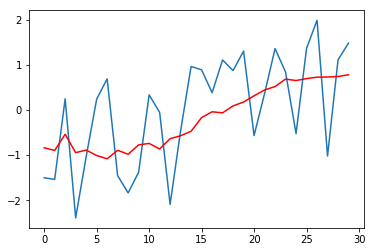

Lag: 27
RMSE: 1.054


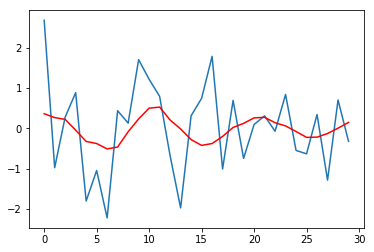

Lag: 27
RMSE: 1.091


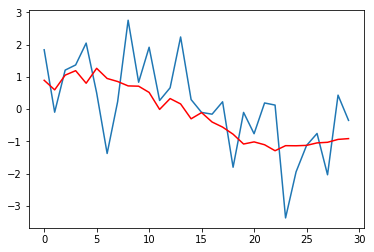

Lag: 27
RMSE: 0.809


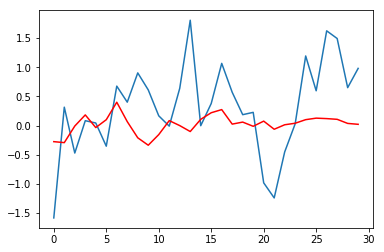

Lag: 27
RMSE: 0.981


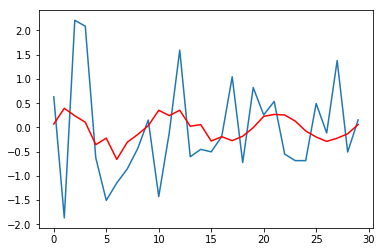

Lag: 27
RMSE: 1.010


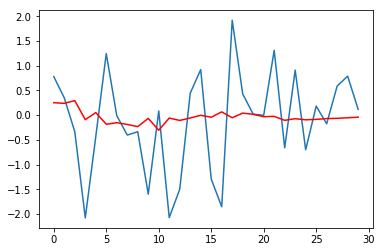

Lag: 27
RMSE: 1.277


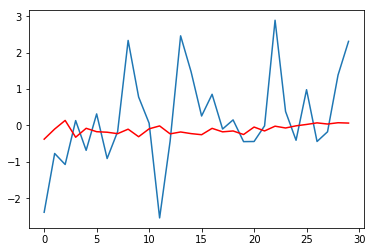

Lag: 27
RMSE: 1.007


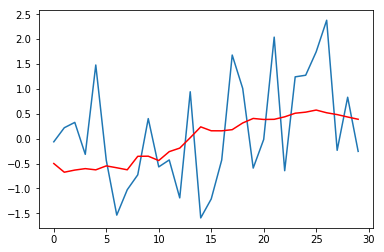

Lag: 27
RMSE: 1.212


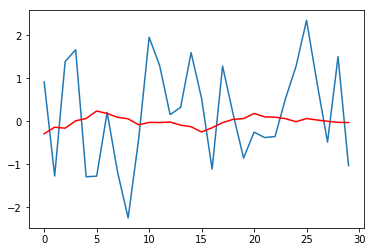

Lag: 27
RMSE: 0.878


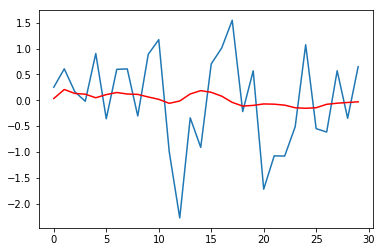

Lag: 27
RMSE: 1.264


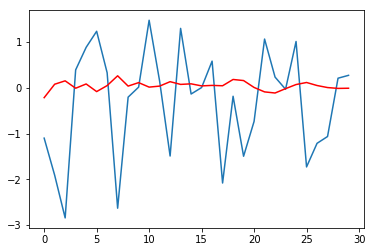

Lag: 27
RMSE: 1.339


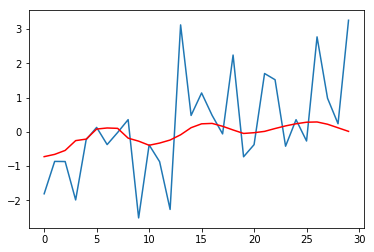

Lag: 27
RMSE: 1.005


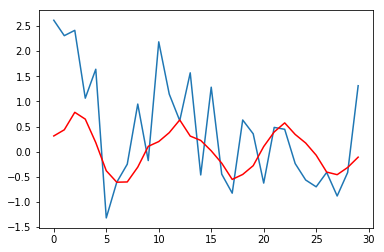

Lag: 27
RMSE: 0.942


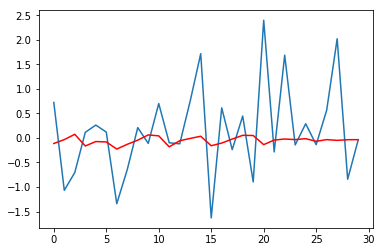

Lag: 27
RMSE: 1.128


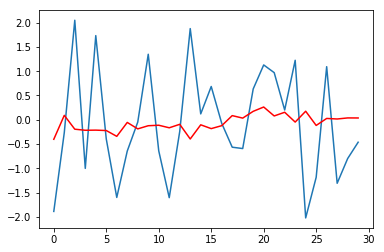

Lag: 27
RMSE: 1.107


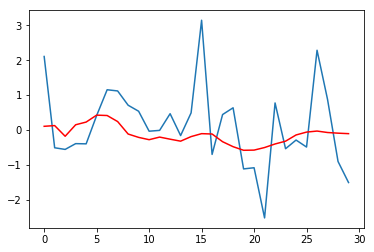

Lag: 27
RMSE: 1.270


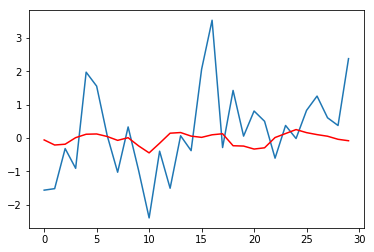

Lag: 27
RMSE: 1.106


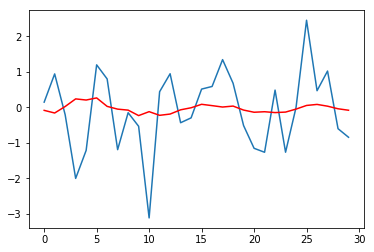

Lag: 27
RMSE: 0.962


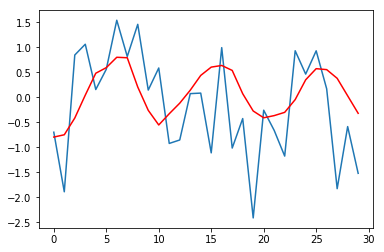

Lag: 27
RMSE: 0.999


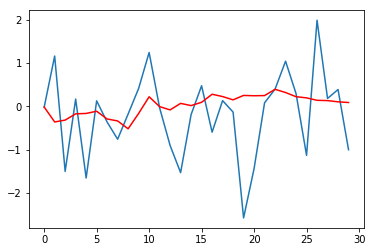

Lag: 27
RMSE: 1.219


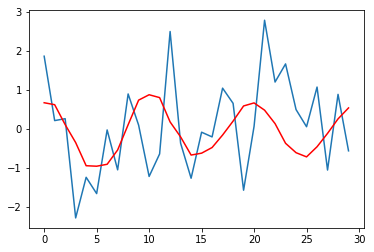

Lag: 27
RMSE: 1.013


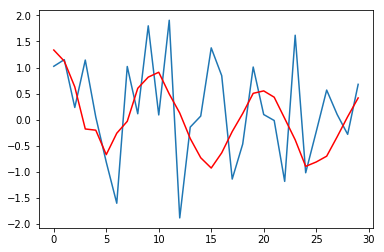

Lag: 27
RMSE: 0.947


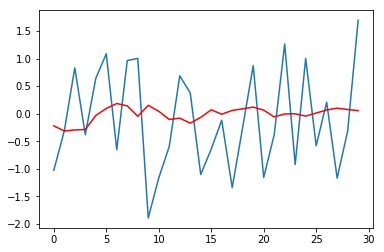

Lag: 27
RMSE: 0.885


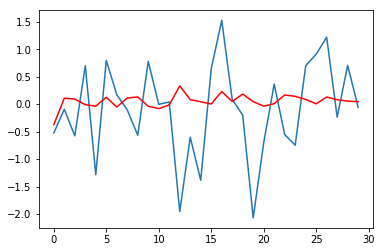

Lag: 27
RMSE: 0.962


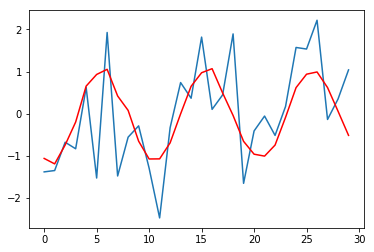

Lag: 27
RMSE: 1.182


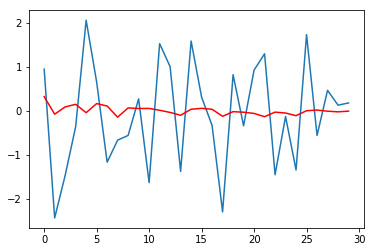

Lag: 27
RMSE: 0.909


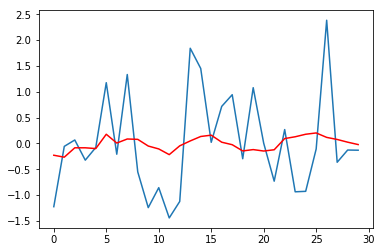

Lag: 27
RMSE: 1.356


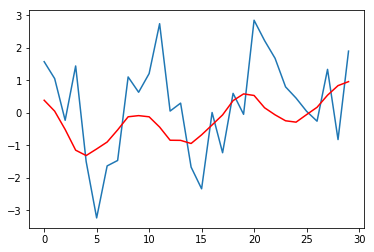

Lag: 27
RMSE: 0.872


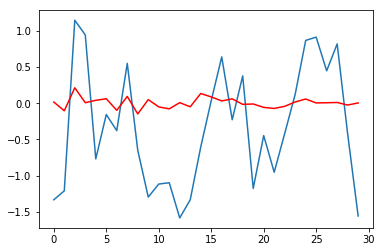

Lag: 27
RMSE: 1.174


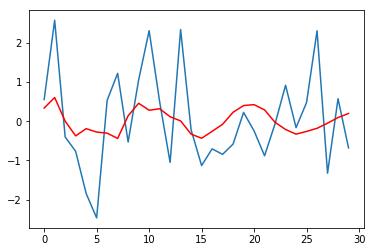

Lag: 27
RMSE: 1.225


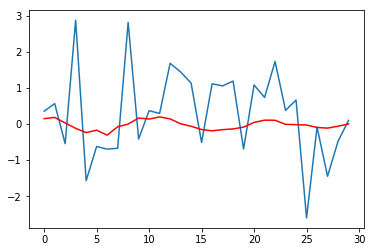

Lag: 27
RMSE: 1.201


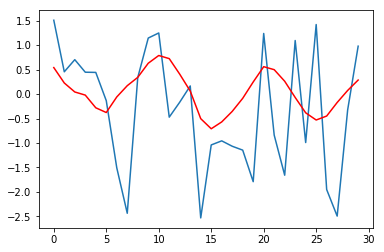

Lag: 27
RMSE: 1.093


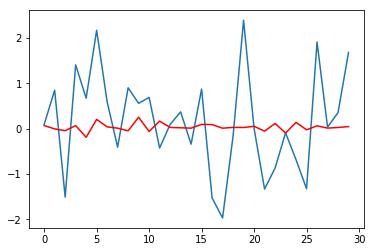

Lag: 27
RMSE: 0.960


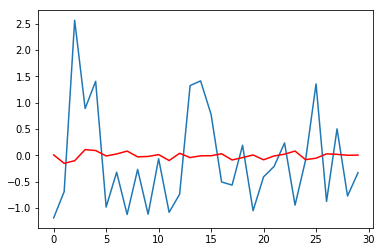

Lag: 27
RMSE: 0.988


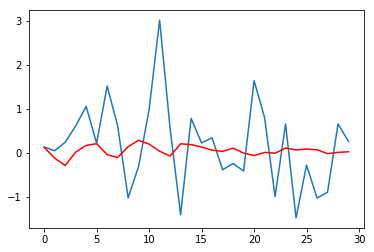

Lag: 27
RMSE: 1.122


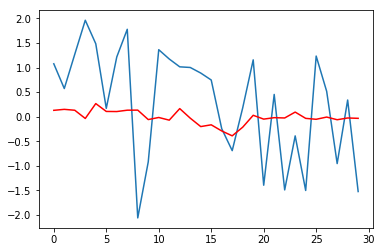

Lag: 27
RMSE: 1.107


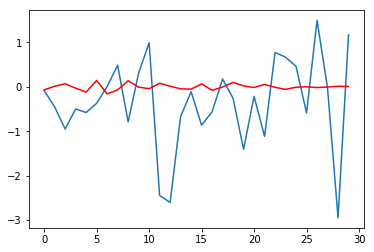

Lag: 27
RMSE: 1.178


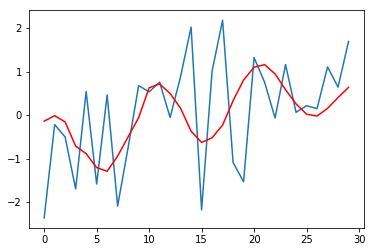

Lag: 27
RMSE: 1.228


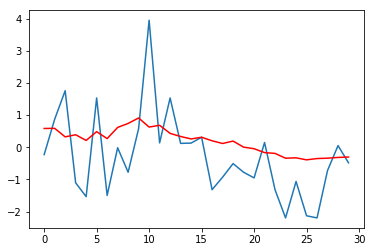

Lag: 27
RMSE: 0.999


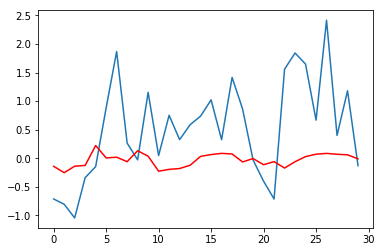

Lag: 27
RMSE: 0.842


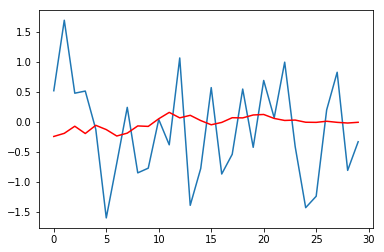

Lag: 27
RMSE: 0.972


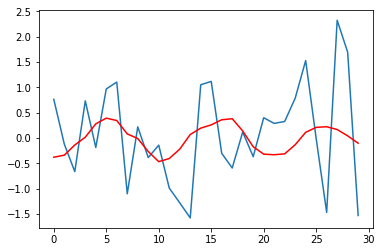

Lag: 27
RMSE: 0.909


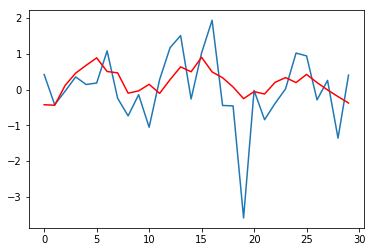

Lag: 27
RMSE: 0.954


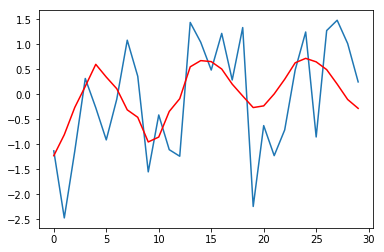

Lag: 27
RMSE: 0.945


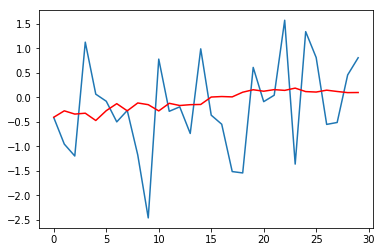

Lag: 27
RMSE: 1.222


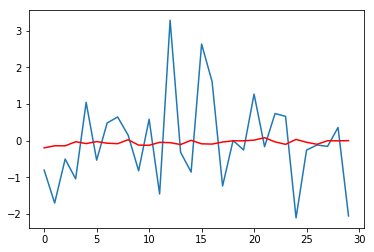

Lag: 27
RMSE: 1.169


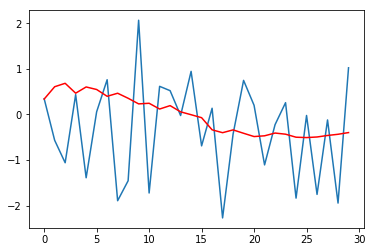

Lag: 27
RMSE: 0.942


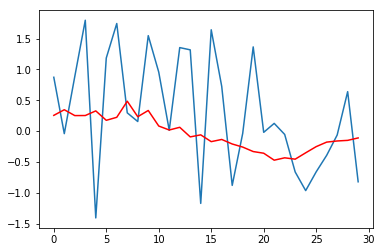

In [6]:
# Fit an Autoregressive model
# It will return the number of lags that model chooses to use and the rmse on one 30-day forecast
for i in list(data2):
    series = data2[[str(i)]]
    # split dataset
    X = series.values
    train, test = X[:len(X)-30], X[len(X)-30:]
    # train autoregression
    model = AR(train)
    model_fit = model.fit()
    print('Lag: %s' % model_fit.k_ar)
    # make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    m = mean_squared_error(test, predictions)
    print('RMSE: %.3f' % np.sqrt(m))
    # plot results
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

In [7]:
# Train on 2100 days, test on 390 days and validate on 10 days
siz=2100
data=data[:-11]


In [8]:
from pandas import DataFrame
from pandas import concat
# convert the data set to contain its lagged data and future prediction 

def convert(data, n_in=1, n_out=1, drop = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('sig%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('sig%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('sig%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    final = concat(cols, axis=1)
    final.columns = names
    if drop:
        final.dropna(inplace=True)
    return final


In [9]:
# as our data is not between -1 and 1, we transformed it to the range
def prepare_data(series, n_test, n_lag, n_seq,scale=False, drop = True):
    # extract raw values
    raw_values = series.values
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    if scale:
        scaled_values = scaler.fit_transform(raw_values)
    else:
        scaled_values = raw_values
    supervised_values = convert(scaled_values, n_lag, n_seq, drop)
    #supervised_values = supervised.values
    # split into train and test sets
    train, test = supervised_values[0:n_test], supervised_values[n_test:]
    return scaler, train, test

In [10]:
# we choose lag number 27 as from AR model
n_lag = 27
# n_cluster mean the number of predicting days that grouped together for training and testing
n_cluster = 10
# 30 days to predict
n_seq = 30
n_test = siz
n_batch = 1
n_neurons = 50

# fit an LSTM network to training data
def fit_lstm(train, n_lag=n_lag, n_seq=n_seq, n_batch=n_batch,n_cluster = n_cluster):
    # reshape training into [samples, timeseps, features]
    X, y = train.values[:, 0:n_lag*df.shape[1]], train.values[:, n_lag*df.shape[1]:]
    X = X.reshape(int(X.shape[0]/n_cluster), n_cluster, X.shape[1])
    y = y.reshape(int(y.shape[0]/n_cluster), n_cluster,y.shape[1])
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, recurrent_dropout =0.5,batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
    model.add(Dropout(0.5))
    model.add(Dense(y.shape[-1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X, y, epochs=20, batch_size=n_batch, verbose=0, shuffle=False)
        
    return model

# prediction with LSTM
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, X.shape[0], X.shape[1])
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

# prediction on testing set
def make_forecasts(model,test,n_batch=n_batch,  n_lag=n_lag, n_seq=n_seq):
    forecasts = list()
    for i in range(int(len(test)/n_cluster)):
        X = test.values[i*n_cluster:(i+1)*n_cluster, 0:n_lag*df.shape[1]]
        # make forecast           
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler):
    inverted = list()
    for i in range(0,len(forecasts)):
        for j in range(0,len(forecasts[i])):
            # create array from forecast
            forecast = np.array(forecasts[i][j])
            forecast = forecast.reshape(int(len(forecast)/series.shape[1]), series.shape[1])
            # invert scaling
            inv_scale = scaler.inverse_transform(forecast)
            inv_scale = inv_scale.reshape(len(forecast)*series.shape[1],1)
            inverted.append(inv_scale)
    return inverted

# inverse data transform on actual data
def inverse_transform2(series, forecasts, scaler):
    inverted = list()
    for i in range(0,len(forecasts)):
        forecast = np.array(forecasts[i])
        forecast = forecast.reshape(int(len(forecast)/series.shape[1]), series.shape[1])
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale.reshape(len(forecast)*series.shape[1],1)
        inverted.append(inv_scale)
    return inverted
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts):
    r = 0
    for i in range(len(test)):
        r2 = np.sqrt(metrics.mean_squared_error(test[i], forecasts[i]))
        r = r+r2
    return r/len(test)

In [11]:
# Test set result
df = data
# prepare data
scaler, train, test = prepare_data(df, n_test, n_lag, n_seq,True)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch)
# make forecasts
forecasts = make_forecasts(model, test,n_batch, n_lag, n_seq)
# inverse transform forecasts and test
predict = inverse_transform(df, forecasts, scaler)
actual = [row[n_lag*df.shape[1]::,] for row in test.values]
actual = inverse_transform2(df, actual, scaler)
# evaluate forecasts|
print(evaluate_forecasts(actual, predict))

0.9948384677401567


In [12]:
# test2 is used as the variables for validation set
# test3 is used as the actual values
scaler2, train2, test2 = prepare_data(data2, n_test, n_lag, n_seq,True)
test2=test2[-10:]
scaler2, train2, test3 = prepare_data(data2, n_test, n_lag, n_seq)
test3=test3[-10:]
forecasts = make_forecasts(model, test2,n_batch, n_lag, n_seq)
# inverse transform forecasts and test
predict = inverse_transform(df, forecasts, scaler)
actual = [row[n_lag*df.shape[1]::,] for row in test3.values]
# evaluate validation set forecasts
print(evaluate_forecasts(actual, predict))

1.0348362810562826


In [13]:
# Final prediction
_, _, final = prepare_data(data2, n_test, n_lag, n_seq,True,False)
final=final[-10:]
forecasts = make_forecasts(model, final,n_batch, n_lag, n_seq)
# inverse transform forecasts 
predict = inverse_transform(data, forecasts, scaler)
# Take the 10th forecast as we have cluster size of 10 and reshape to it 30*50
final_result=predict[-1].reshape(30,50)
# Generate csv file
final_result = pd.DataFrame(final_result)
final_result.to_csv("final.csv")

In [15]:
final_result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.245654,-0.730917,0.479207,0.395333,-0.620082,0.046308,0.373379,0.316231,0.256049,0.268779,...,-0.163262,-0.120909,0.316724,-0.099420,-0.444744,-0.028906,0.329631,-0.197850,-0.390004,-0.383680
1,-0.475143,-0.811006,0.391169,0.597390,-0.697514,0.046408,0.552335,0.250980,0.220736,0.184015,...,0.052575,-0.219684,0.322623,-0.266402,-0.675503,-0.189439,0.155201,-0.285163,-0.325432,-0.381305
2,-0.488926,-0.809988,0.199982,0.584877,-0.594900,-0.048769,0.549769,0.257667,0.112292,0.193388,...,0.034166,-0.205275,0.328963,-0.273109,-0.628249,-0.194233,0.233858,-0.294844,-0.316213,-0.375295
3,-0.202874,-0.609680,0.319473,0.318951,-0.503250,0.082815,0.342558,0.079581,0.121606,0.160786,...,0.016161,-0.103137,0.300082,-0.139048,-0.390808,-0.146545,0.328970,-0.345261,-0.243213,-0.258165
4,0.003304,-0.133988,0.266808,0.040919,-0.437280,0.318032,0.007815,0.017936,0.074963,0.139132,...,-0.188610,0.032440,0.095340,-0.007882,-0.142552,0.246506,0.092896,-0.026465,-0.342257,-0.181443
5,0.378611,0.237581,0.394242,-0.235222,-0.355169,0.387157,-0.361138,-0.014948,0.113463,0.271760,...,-0.276076,0.256338,0.001812,0.341731,0.074024,0.482899,0.052194,0.136362,-0.180430,-0.073167
6,0.610362,0.367212,0.265672,-0.358866,-0.165680,0.436119,-0.538835,-0.017757,0.117591,0.276321,...,-0.355050,0.417835,-0.158534,0.485427,0.368938,0.564538,-0.012571,0.237135,-0.225453,0.080694
7,0.543598,0.520735,0.190036,-0.292132,-0.106749,0.380651,-0.559254,-0.037435,0.096305,0.211513,...,-0.279150,0.250903,-0.164123,0.542183,0.520064,0.489026,-0.063306,0.339405,-0.167181,0.138701
8,0.328916,0.423090,0.032114,-0.088560,0.037259,0.236849,-0.372550,0.013533,0.049626,0.032603,...,-0.153357,0.168695,-0.085535,0.288632,0.346031,0.391385,0.041751,0.175212,0.022202,0.171442
9,-0.017543,0.126543,-0.104766,0.052054,0.195654,-0.028152,-0.078048,0.002818,-0.042482,-0.124891,...,0.028333,-0.044852,0.049534,0.070427,0.065267,-0.050542,-0.072220,-0.021982,0.117828,0.109732
